In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
dir_in ="/raid61/LS4P-TPEMIP/REFERENCE/CN05.1/"
ds_obs = xr.open_dataset(dir_in + "sel_CN05.1_Tm_1961_2018_daily_025x025.nc").load()
dir_in ="/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
ds_sys = xr.open_dataset(dir_in + "SYS_t2m.nc").rename({"Time":"time"}).load()
ds_nju_B = xr.open_dataset(dir_in + "NJU_LS4P_B_t2m.nc").load()
ds_nju_C = xr.open_dataset(dir_in + "NJU_LS4P_C_t2m.nc").load()
ds_yzx    = xr.open_dataset(dir_in + "Yang-ZhouX_t2m.nc").rename({"Time":"time"}).load()
ds_ysu    = xr.open_dataset(dir_in + "YSU_t2m.nc").load()
ds_jamstecwrf    = xr.open_dataset(dir_in + "JAMSTECWRF_t2m.nc").load()
ds_cwrf    = xr.open_dataset(dir_in + "CWRF_t2m.nc").load()
# 整理到字典 mod_var 
var = {}
var['obs'] = ds_obs['tm']
var['sys'] = ds_sys['T2']
var["nju_B"] = ds_nju_B['tas'][:,0,:,:]
var["nju_C"] = ds_nju_C['tas'][:,0,:,:]
var["yzx"] = ds_yzx['T2']
var['ysu'] = ds_ysu['t2m']
var['jam'] = ds_jamstecwrf['t2m']
var['cwrf'] = ds_cwrf['t2m']

In [4]:
var_am = {}
var_jja= {}
for single_mod in var:
    print("-----dealing: " + single_mod)
    var_am[single_mod] = var[single_mod].sel(time = var[single_mod].time.dt.month.isin([4,5])).mean('time') 
    var_jja[single_mod] = var[single_mod].sel(time = var[single_mod].time.dt.month.isin([6,7,8])).mean('time')

-----dealing: obs
-----dealing: sys
-----dealing: nju_B
-----dealing: nju_C
-----dealing: yzx
-----dealing: ysu
-----dealing: jam
-----dealing: cwrf


绘制部分

In [5]:
# 国内政区图的绘制
# Load the border data, CN-border-La.dat is download from
# https://gmt-china.org/data/CN-border-La.dat
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

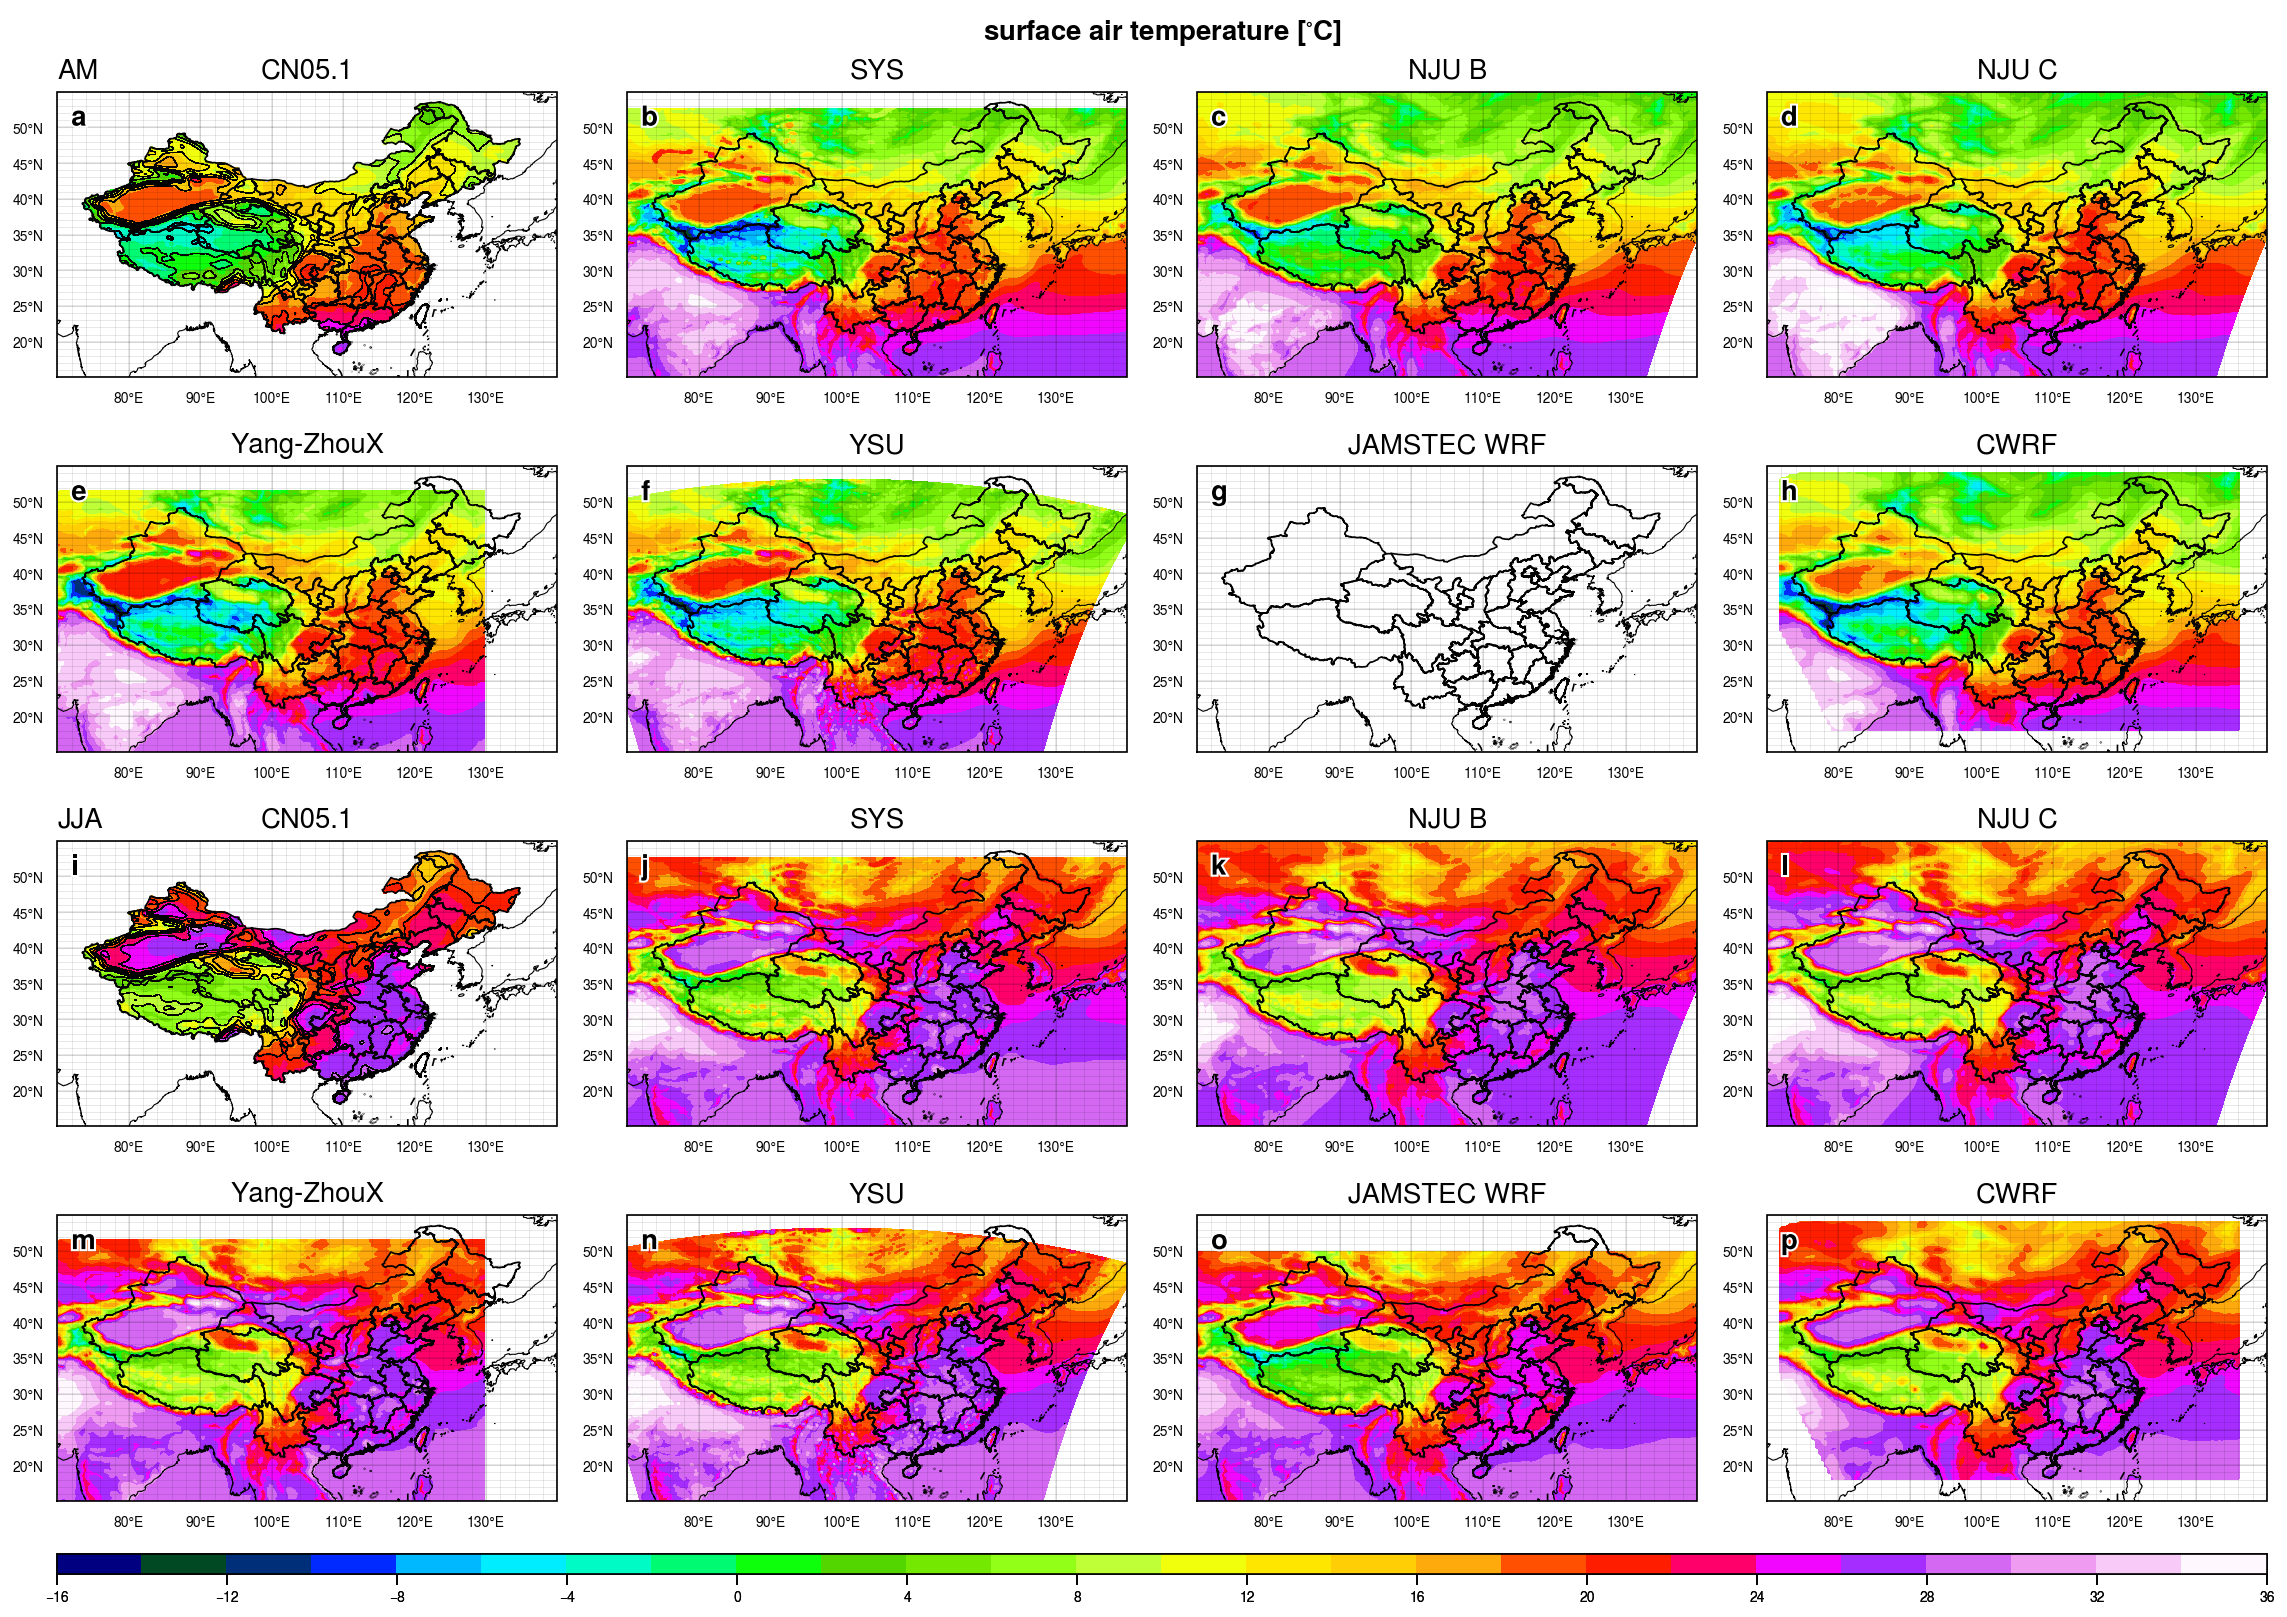

In [10]:
# import proplot as plot
from matplotlib import pyplot as plt
import proplot as plot
# ----- get filter vars coords-----
cmap='gist_ncar'
ticks = np.arange(-16,38,2)
#----- create plot -----
fig, axs = plot.subplots(ncols=4, nrows=4, proj=('cyl'))


#----- 添加海洋以及行政区划 -----
##---- 直接绘图，从边界文件添加
turn_on_border = True
if(turn_on_border):
    ##---- 使用shp文件添加
        ## shapefile数据下载的位置：
    coast_shapefile = "/home/yycheng/playground/shapefiles/gshhg-shp/GSHHS_shp/l/GSHHS_l_L1.shp"
    ## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
    # world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
#     river_border_shapefile =  "/raid52/yycheng/MPAS/REFERENCE/MODEL_CONSTANT/R1/" + "hyd1_4l.shp"
#     southsea_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "southsea_island.shp"
    ninelines_shapefile     = "/home/yycheng/playground/shapefiles/SouthSea/" + "nine_lines.shp"
    ## 来源： 沛沛的诸省 + 诸岛
#     bou24p_shapefile     = "/m2data2/yycheng/data_stage/CN-border/peipeihelp/" + "bou2_4p.shp"
    ## 来源： https://www.resdc.cn/data.aspx?DATAID=200
    province_shapefile     = "/home/yycheng/playground/shapefiles/CN-sheng/" + "change_proj_CN-sheng-A.shp"

    for ax in axs:
        coast = shpreader.Reader(coast_shapefile).geometries()
        # world     = shpreader.Reader(world_border_shapefile).geometries()
        # river     = shpreader.Reader(river_border_shapefile).geometries()
#         river     = shpreader.Reader(river_border_shapefile, encoding = 'gbk')
        # bou24p    = shpreader.Reader(bou24p_shapefile).geometries()
        ninelines = shpreader.Reader(ninelines_shapefile).geometries()
        province  = shpreader.Reader(province_shapefile).geometries()
        ax.add_geometries(coast, ccrs.PlateCarree(), facecolor="none", edgecolor = 'k', linewidth=0.4, zorder=1 )
        # ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.4, zorder=1)
        # ax.add_geometries(bou24p, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1) # 沛沛map
        ax.add_geometries(province, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1) # 地资所
        ax.add_geometries(ninelines, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1)
        # ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.4, zorder=1)
        # 绘制部分的shapefile
#         for region in river.records():
#             if (region.attributes['NAME'] in ['黄河','长江']):
#                 # print("----- draw river! -----")
#                 # 此处需要使用 [] 让region.geometry可以迭代
#                 ax.add_geometries([region.geometry], ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.6, zorder=1)



axs[0:1,0].format(ltitle = "AM")
axs[2:3,0].format(ltitle = "JJA")
axs[0:3:2,0].format(title = "CN05.1")
axs[0:3:2,1].format(title = "SYS")
axs[0:3:2,2].format(title = "NJU B")
axs[0:3:2,3].format(title = "NJU C")
axs[0:3:2,4].format(title = "Yang-ZhouX")
axs[0:3:2,5].format(title = "YSU")
axs[0:3:2,6].format(title = "JAMSTEC WRF")
axs[0:3:2,7].format(title = "CWRF")
#-----a m-----
m         = axs[0].contour(var_am['obs'].lon, var_am['obs'].lat, var_am['obs'], levels=ticks[::2], color='k', linewidth = .2,antialiased=False)
m_overlay = axs[0].contourf(var_am['obs'].lon, var_am['obs'].lat, var_am['obs'], levels=ticks, cmap=cmap)
#-----sys-----
m_overlay = axs[1].contourf(ds_sys.XLONG[0,:,:], ds_sys.XLAT[0,:,:], var_am['sys'] - 273.15, levels=ticks, cmap=cmap)
#-----NJU B-----
m_overlay = axs[2].contourf(var_am['nju_B'].xlon, var_am['nju_B'].xlat, var_am['nju_B'] - 273.15, levels=ticks, cmap=cmap)
#-----NJU_C-----
m_overlay = axs[3].contourf(var_am['nju_C'].xlon, var_am['nju_C'].xlat, var_am['nju_C'] - 273.15, levels=ticks, cmap=cmap)
#-----Yang-ZhouX-----
m_overlay = axs[4].contourf(var_am['yzx'].XLONG, var_am['yzx'].XLAT, var_am['yzx'] - 273.15, levels=ticks, cmap=cmap)
#-----YSU----
m_overlay = axs[5].contourf(var_am['ysu'].XLONG, var_am['ysu'].XLAT, var_am['ysu'] - 273.15, levels=ticks, cmap=cmap)
#-----JAM----
# m_overlay = axs[6].contourf(var_am['jam'].lon, var_am['jam'].lat, var_am['jam'] - 273.15, levels=ticks, cmap=cmap)
#-----CWRF----
m_overlay = axs[7].contourf(var_am['cwrf'].lon, var_am['cwrf'].lat, var_am['cwrf'] - 273.15, levels=ticks, cmap=cmap)


#-----jja-----
#-----obs-----
m         = axs[8].contour(var_jja['obs'].lon, var_jja['obs'].lat, var_jja['obs'], levels=ticks[::2], color='k', linewidth = .2, antialiased=False)
m_overlay = axs[8].contourf(var_jja['obs'].lon, var_jja['obs'].lat, var_jja['obs'], levels=ticks, cmap=cmap)
#-----sys-----
m_overlay = axs[9].contourf(ds_sys.XLONG[0,:,:], ds_sys.XLAT[0,:,:], var_jja['sys'] - 273.15, levels=ticks, cmap=cmap)
#-----NJU-----
m_overlay = axs[10].contourf(var_jja['nju_B'].xlon, var_jja['nju_B'].xlat, var_jja['nju_B'] - 273.15,levels=ticks,cmap=cmap)
#-----NJU_new-----
m_overlay = axs[11].contourf(var_jja['nju_C'].xlon, var_jja['nju_C'].xlat, var_jja['nju_C'] - 273.15,levels=ticks,cmap=cmap)
#-----Yang-ZhouX-----
m_overlay = axs[12].contourf(var_jja['yzx'].XLONG, var_jja['yzx'].XLAT, var_jja['yzx'] - 273.15, levels=ticks, cmap=cmap)
#-----YSU----
m_overlay = axs[13].contourf(var_jja['ysu'].XLONG, var_jja['ysu'].XLAT, var_jja['ysu'] - 273.15, levels=ticks, cmap=cmap)
#-----JAM----
m_overlay = axs[14].contourf(var_jja['jam'].lon, var_jja['jam'].lat, var_jja['jam'] - 273.15, levels=ticks, cmap=cmap)
#-----CWRF----
m_overlay = axs[15].contourf(var_jja['cwrf'].lon, var_jja['cwrf'].lat, var_jja['cwrf'] - 273.15, levels=ticks, cmap=cmap)

fig.colorbar(m_overlay, loc='b', cmap=cmap, width=0.1, ticklabelsize=5,ticks=ticks[::2])
# ---------format作为整个proplot集中对属性进行修改的method---------
axs.format(
abc=True,
abcloc = 'ul',
#----- 地图底图设置 -----
# reso = 'x-hi',
reso = 'med',
# coast = False,
coast = False,
coastlinewidth = 0.4,
borders = False,
lakes = False,
land  = False,
ocean = False,
#-----GEO axis-----
lonlim=(70, 140), latlim=(15, 55),
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
# lonlocator = np.arange(70,150,10),
# latlocator = np.arange(15,65,10),
# lonminorlocator = np.arange(70,140+2,2),
# latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
suptitle="surface air temperature "+ "[" + r"$^{\circ} C$" + "]" ,
)

fig.patch.set_facecolor('white')
plt.savefig('./output_pic/t2m_spatial_1008.png', dpi=600, facecolor= "white")